### Group_Assignment_2

## Andy Kim -- andy.kim141@gmail.com -- 28396159
## Dimitrije Gacic -- gacicd77@gmail.com -- 84137744
## Nila Akter -- nilaakter604@gmail.com -- 31043169

In [2]:
import pandas as pd

In [3]:
#Read the given credit_data csv file, drop duplicates and missing values
df = pd.read_csv('credit_data.csv', index_col=0).drop_duplicates().dropna()

In [4]:
df

,BAD,DEBTINC,DELINQ,DEROG,VALUE,CLAGE
0,0,28.749890,0,0.0,89082.0,217.321155
1,0,41.447506,1,0.0,194992.0,337.689972
2,0,29.964687,0,0.0,63601.0,153.735399
3,0,38.251392,0,0.0,37391.0,217.744275
4,1,43.159875,1,0.0,81922.0,120.885811
...,...,...,...,...,...,...
614,0,32.175036,0,0.0,81012.0,242.940514
615,0,20.929729,0,0.0,59993.0,111.237597
616,0,24.350858,0,0.0,103344.0,104.404597
617,0,39.483914,0,0.0,237546.0,291.633415


In [5]:
#Changing the BAD column name to 'LOAN' and assigning 0 to 'REPAID' and 1 to 'DEFAULT' (Human Readable values)

BAD = {0: 'REPAID',1: 'DEFAULT'}

df.BAD = [BAD[item] for item in df.BAD]

df= df.rename(columns = {'BAD': 'LOAN'}, inplace = False)

In [6]:
df

,LOAN,DEBTINC,DELINQ,DEROG,VALUE,CLAGE
0,REPAID,28.749890,0,0.0,89082.0,217.321155
1,REPAID,41.447506,1,0.0,194992.0,337.689972
2,REPAID,29.964687,0,0.0,63601.0,153.735399
3,REPAID,38.251392,0,0.0,37391.0,217.744275
4,DEFAULT,43.159875,1,0.0,81922.0,120.885811
...,...,...,...,...,...,...
614,REPAID,32.175036,0,0.0,81012.0,242.940514
615,REPAID,20.929729,0,0.0,59993.0,111.237597
616,REPAID,24.350858,0,0.0,103344.0,104.404597
617,REPAID,39.483914,0,0.0,237546.0,291.633415


In [7]:
#Independent data
x = df[['DEBTINC', 'DELINQ', 'DEROG', 'VALUE', 'CLAGE']]
#Dependent Data
y = df['LOAN']

In [8]:
#Split the data into training data and testing data
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [10]:
x_train

,DEBTINC,DELINQ,DEROG,VALUE,CLAGE
516,35.243121,0,0.0,44195.0,91.923529
258,30.424481,0,0.0,150896.0,123.479538
380,34.950823,0,2.0,80424.0,65.847530
558,40.206334,0,0.0,46925.0,178.002383
353,47.619764,0,0.0,143433.0,227.932893
...,...,...,...,...,...
107,30.187805,0,0.0,46833.0,83.289063
590,18.324935,0,0.0,51720.0,123.218105
41,19.089301,2,2.0,55320.0,234.021816
285,40.851444,0,0.0,104114.0,224.482939


In [11]:
#Importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [12]:
#Importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
#Create decision tree function
dt_model = DecisionTreeClassifier()

In [14]:
#Fitting the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
#Check the training score
dt_model.score(x_train, y_train)

1.0

In [16]:
#Check the test score
dt_model.score(x_test, y_test)

0.7473118279569892

In [17]:
#Predictions on test score
dt_model.predict(x_test)

array(['DEFAULT', 'DEFAULT', 'DEFAULT', 'DEFAULT', 'DEFAULT', 'REPAID',
       'REPAID', 'DEFAULT', 'REPAID', 'DEFAULT', 'DEFAULT', 'REPAID',
       'REPAID', 'REPAID', 'REPAID', 'REPAID', 'REPAID', 'DEFAULT',
       'DEFAULT', 'REPAID', 'REPAID', 'REPAID', 'REPAID', 'REPAID',
       'DEFAULT', 'DEFAULT', 'REPAID', 'REPAID', 'REPAID', 'DEFAULT',
       'REPAID', 'DEFAULT', 'REPAID', 'DEFAULT', 'REPAID', 'DEFAULT',
       'REPAID', 'DEFAULT', 'REPAID', 'REPAID', 'DEFAULT', 'REPAID',
       'DEFAULT', 'REPAID', 'DEFAULT', 'REPAID', 'REPAID', 'REPAID',
       'REPAID', 'DEFAULT', 'REPAID', 'REPAID', 'REPAID', 'REPAID',
       'REPAID', 'REPAID', 'REPAID', 'DEFAULT', 'DEFAULT', 'DEFAULT',
       'DEFAULT', 'DEFAULT', 'REPAID', 'DEFAULT', 'REPAID', 'DEFAULT',
       'REPAID', 'REPAID', 'DEFAULT', 'REPAID', 'REPAID', 'DEFAULT',
       'DEFAULT', 'DEFAULT', 'DEFAULT', 'REPAID', 'DEFAULT', 'DEFAULT',
       'DEFAULT', 'REPAID', 'REPAID', 'REPAID', 'REPAID', 'REPAID',
       'REPAID', 'REPAID',

In [18]:
#Changing the max_depth to combat overfitting of the model

In [19]:
#Loop through max_depths of 1-10 to find the most optimal solution
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test, y_test))

In [20]:
frame = pd.DataFrame({'max_depth': range(1,10), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
frame.head(11)

,max_depth,train_acc,test_acc
0,1,0.658199,0.629032
1,2,0.720554,0.715054
2,3,0.725173,0.715054
3,4,0.762125,0.709677
4,5,0.806005,0.731183
5,6,0.824480,0.725806
6,7,0.863741,0.758065
7,8,0.891455,0.763441
8,9,0.928406,0.736559


In [21]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


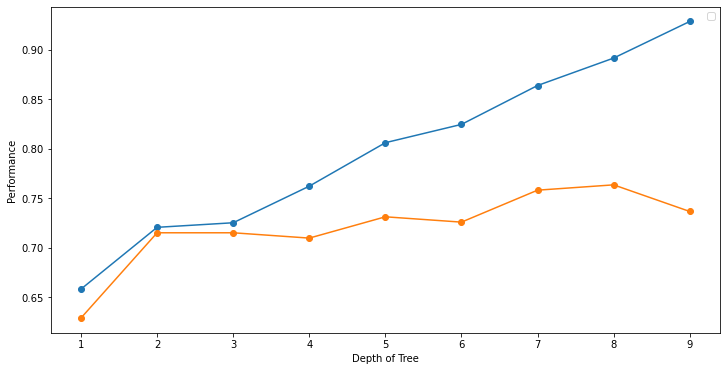

In [24]:
#Visualize max_depth performance
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend()

In [25]:
#Create a new decision tree function with our optimal max_depth of 8
dt_model = DecisionTreeClassifier(max_depth=8, random_state=10)

In [27]:
#Fit the new model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=10)

In [28]:
#Training Score
dt_model.score(x_train, y_train)

0.8914549653579676

In [29]:
#Test Score
dt_model.score(x_test, y_test)

0.7634408602150538

In [30]:
from sklearn import tree

In [31]:
!pip install graphviz

In [44]:
#Plotting/creating the decision tree visual
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=x_train.columns,max_depth=3,filled=True)

In [45]:
!dot -Tpng tree.dot -o tree.png

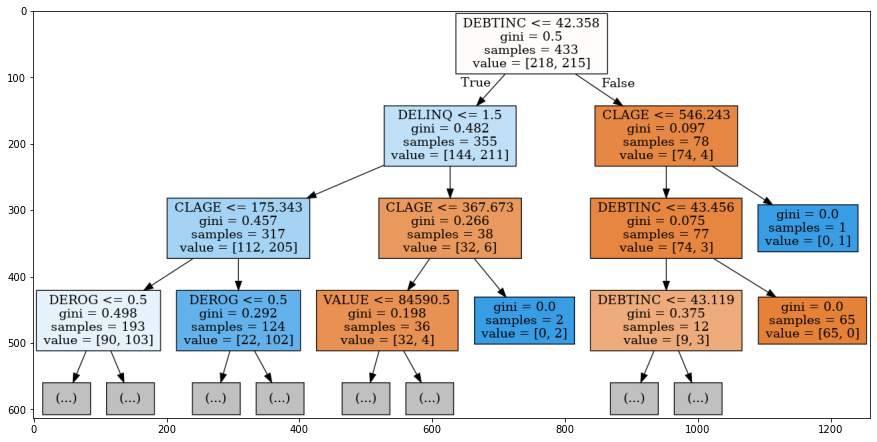

In [46]:
#Printing our decision tree (with a max_depth of 3 for space issues)
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

# Project Report


Our group began the analysis by importing pandas to perform data manipulation. By using the pandas library, we imported the ‘credit_data.csv’ file into Jupyter lab. We were able to accomplish this by using the .read_csv function.

Our first task for this project was to remove duplicates and drop any rows that were missing values. To accomplish this, we implemented the .drop_duplicates() and dropna() functions. This narrowed the number of rows down to 619, as opposed to the original 624.

To finish preparing the data, our group needed to convert “BAD” from ordinal values to categorical values. To do so, we created a dictionary containing the keys 0 and 1, and the respective values of “REPAID” and “DEFAULT”. To apply this to our data frame, we made a for loop that loops through each item in the column “BAD” and applies the correct dictionary value to each entry. Lastly, we renamed the “BAD” column to “LOAN” so the column would read as the status of their last loan (either repaid or defaulted). This process was done to enhance the comprehension of data for humans reading the results.

Following the data preparation phase, we then began to split the data into training and testing data. To do so, we created our x values and y values to the following:

x = df[['DEBTINC', 'DELINQ', 'DEROG', 'VALUE', 'CLAGE']]
y = df['LOAN']

After splitting the data into training and testing data, our group imported DecisionTreeClassifier and DecisionTreeRegressor from sklearn.tree to build our model. After creating the DecisionTreeClassifier function, we fit the model, checked both the training scores and the test scores, and then created predictions based on the test score. Our group learned how to tune our decision tree and make it more accurate by changing the max_depth parameter (the length of the tree's longest path). We needed to make sure that our max_depth value was not too low (underfitting), but not too high (overfitting).

We noticed that our model’s training score was 1.0; hence, our prediction model might be prone to overfitting. To make our decision tree more accurate, we looped through the max_depths of 1 to 10 to find the most optimal solution. We visualized our results in line 24 where the yellow line represents the test_acc (test accuracy) and the blue line indicates the train_acc (training accuracy). We observed that the test accuracy declines after the 8th iteration and eventually becomes a straight horizontal line, whereas the training accuracy eventually approaches 1.0. Therefore, we concluded that a max_depth past 8 was where our training model may begin to overfit the data; thus, we created a new decision tree function that sets the max_depth parameter to 8.

With the new model, we were able to get a training score of around 0.88 with a test score of approximately 0.74. To visualize our decision tree, we decided to import tree from sklearn and install graphviz using the pip install command. Once we confirmed that the decision tree complies with our model by comparatively analyzing the given data set from ‘credit_data.csv’, our group plotted the decision tree on line 62. Currently, the tree only shows a max_depth of 3 due to sizing issues but can be expanded up to a max_depth of 8 for complete visualization.

 

The numbers that we pulled from our model include an accuracy rate, a training accuracy and a testing accuracy. The accuracy rate we get on the training model is 100% because it calculates the number of correct classifications over the total number of classifications, and because the model was trained with the same data it's tested against, the accuracy, logically, is 100%. The number that is actually more insightful is the accuracy rate of the testing data. The whole reason we have the testing data is to be able to judge how accurate our model is, and to judge this it calculates, with data that is new to the model, the number of correct ‘test’ classifications over the total number of ‘test’ classifications. 

When creating our decision tree we chose a max depth of 8 to avoid overfitting the data while also capturing enough details to make the most accurate model. In this case we found that the optimal max depth, or number of layers (splits), in our tree is 8, which allows for not over generalizing but while also keeping the highest accuracy rate compared to the other outcomes from other depths. 

In our decision tree visualization, the important numbers to note are the gini (gini impurity test), sample size, and the number that the variable in that leaf is less than or equal to. The sample size is of the occurrences that are being evaluated as either true or false within the leaf node and the gini is a calculation that measures the probability of the node ‘incorrectly’ classifying an occurrence as true or false against the “<=” condition of the given variable. The closer the gini number is to zero the higher the purity is, which is more optimal because it means there is less uncertainty or in other words, less chance of the occurrence being incorrectly evaluated. 
